In [3]:
import pandas as pd
import numpy as np

In [11]:
X = [1,2,3,4,5,6,7,8,9,10]

In [8]:
# 평균 구하기
np.mean(X)
pd.Series(X).mean()

5.5

In [13]:
# 중앙값 구하기
np.median(X)
pd.Series(X).median()

5.5

In [14]:
X = pd.Series(np.random.randint(10,100,1000))

In [16]:
# 중복값 제외하고 중앙값 구하기
X[~X.duplicated()].median()

54.5

In [18]:
# 최댓값, 최솟값 구하기
X.max()
X.min()

10

In [21]:
# 분위수 구하기
X.quantile(0.5)

53.0

In [25]:
# 분산, 표준편차 구하기
X.var()
X.std()

26.353916766373217

In [26]:
# 최빈값 구하기
X.mode()

0    11
dtype: int32

In [27]:
import matplotlib.pyplot as plt

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('https://bit.ly/3RhoNho')

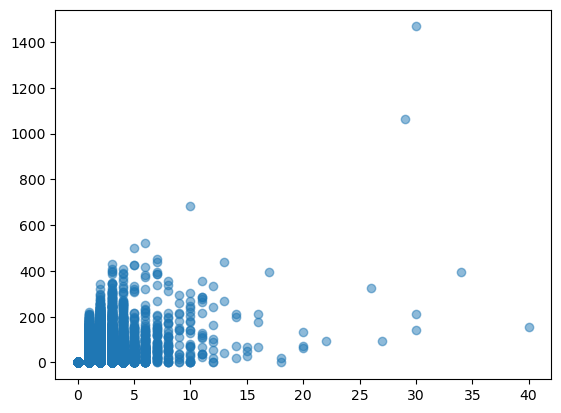

In [32]:
# df의 도서권수와 대출건수로 산점도 그리기 (투명도 0.5)
plt.scatter(df.도서권수,df.대출건수,alpha=0.5)

<Axes: ylabel='Frequency'>

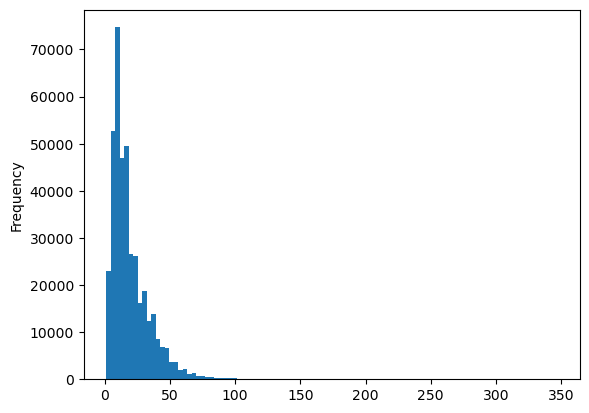

In [35]:
# 도서명으로 na삭제, string변환, 길이확인, int로 변환순으로 히스토그램 그리기 (100개 구간으로)
df.도서명.dropna().str.len().astype(int).plot.hist(bins=100)

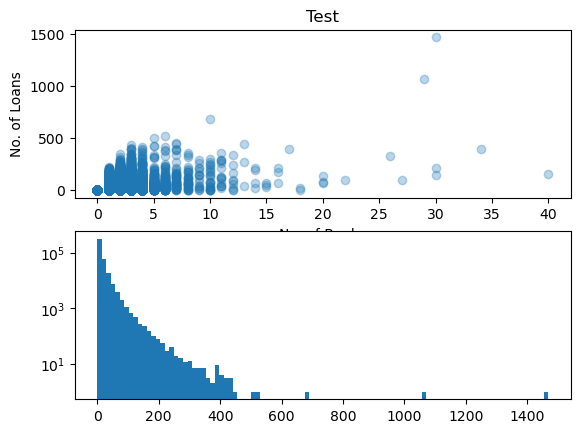

In [37]:
# 위 두개의 그래프를 서브플롯으로 한 번에 그리기 (x축, y축에 이름 정해주고 제목 정하기)
fig, ax = plt.subplots(2)
ax[0].set_title('Test')
ax[0].scatter(df.도서권수,df.대출건수,alpha=0.3)
ax[0].set_xlabel('No. of Books')
ax[0].set_ylabel('No. of Loans')
ax[1].hist(df.대출건수,bins=100)
ax[1].set_yscale('log')
fig.show()

In [38]:
x = ["Female","Male"]
y = [np.random.choice(100),np.random.choice(100)]

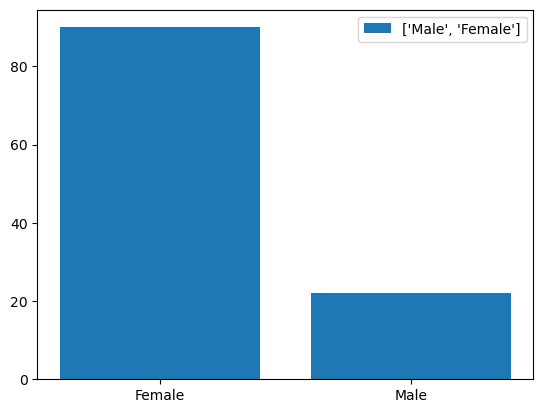

In [40]:
# 위 자료로 bar 그래프 그리고 그래프 안에 legend 표시
fig, ax = plt.subplots(1)
ax.bar(x,y)
ax.legend([['Female','Male']])

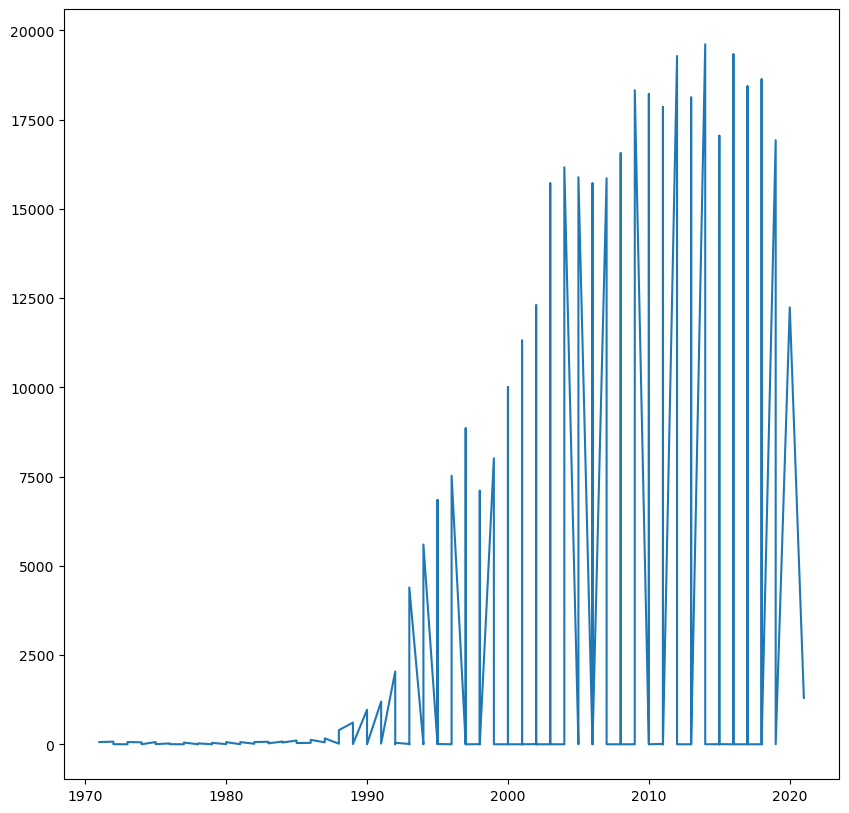

In [49]:
# 발행년도별로 count를 구하기 (Series)
new_df = df.발행년도.value_counts()
# 발행년도가 인덱스인 Series를 발행년도가 컬럼으로 된 데이터프레임으로 변환
new_df = new_df.reset_index()
# 컬럼 이름 재정리
new_df.columns = ['발행년도','출판물수']
# 발행년도를 앞 4자리만 나오게 슬라이싱
new_df.발행년도 = new_df.발행년도.str[:4]
# 앞 4자리가 int형이 아닌 애들을 지우기
remove_data = []
for idx, val in enumerate(new_df.발행년도):
    try:
        int(val)
    except:
        remove_data.append(idx)
new_df.drop(remove_data,inplace=True)
# 발행년도를 int형으로 바꾸기
new_df.발행년도 = new_df.발행년도.astype(int)
# 1900년도 이전, 2024년 이후 발행년도 데이터 제거
tidy_df = new_df.loc[(new_df.발행년도 > 1970) & (new_df.발행년도 < 2024),:]
# 발행년도를 오름차순으로 정렬
x = tidy_df.sort_values(by="발행년도").발행년도
# 출판물수를 발행년도 기준으로 오름차순 정렬
y = tidy_df.sort_values(by="발행년도").출판물수
# 그래프 그리기
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.show()

In [50]:
test = pd.DataFrame({'gender' : np.random.choice(['남자','여자'],5), 'pet' : np.random.choice(['고양이','강아지','원숭이'],5)})
test1 = pd.DataFrame({'gender' : np.random.choice(['남성','여성'],5), 'pet' : np.random.choice(['고양이','강아지','원숭이'],5)})
test = pd.concat([test,test1])

In [54]:
# 앞 글자만 슬라이싱 해와서 value_counts하기
test.gender.str[:1].value_counts()

남    5
여    5
Name: gender, dtype: int64